<img src="https://heig-vd.ch/docs/default-source/doc-global-newsletter/2020-slim.svg" alt="Logo HEIG-VD" style="width: 80px;" align="right"/>

# Cours APN - Labo 5 : Cartes auto-organisatrices (SOM) de Kohonen

## Résumé

Le but de ce laboratoire est de réaliser une expérience de groupement avec des cartes auto-organisatrices.  Le code vous est fourni, y compris les deux librairies `kohonen.py` et `KohonenUtils.py`.  On vous demande de trouver une bonne paramétrisation de la carte, et d'expliquer brièvement quelques éléments de code.

In [1]:
import KohonenUtils
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Données

On considère une liste de 16 animaux, décrits à l'aide de 13 attributs booléens.  Les données sont fournies dans cette section.  Veuillez exécuter les cellules, inspecter les données, et répondre à la question finale.

In [2]:
matrix = np.array([[1,0,0,1,0,0,0,0,1,0,0,1,0],
                   [1,0,0,1,0,0,0,0,1,0,0,0,0],
                   [1,0,0,1,0,0,0,0,1,0,0,0,1],
                   [1,0,0,1,0,0,0,1,1,0,0,1,1],
                   [1,0,0,1,0,0,0,0,1,1,0,1,0],
                   [1,0,0,1,0,0,0,0,1,1,0,1,0],
                   [0,1,0,1,0,0,0,0,1,1,0,1,0],
                   [0,1,0,0,1,1,0,0,0,1,0,0,0],
                   [0,1,0,0,1,1,0,0,0,0,1,0,0],
                   [0,1,0,0,1,1,0,1,0,1,1,0,0],
                   [1,0,0,0,1,1,0,0,0,1,0,0,0],
                   [0,0,1,0,1,1,0,0,0,1,1,0,0],
                   [0,0,1,0,1,1,0,1,0,1,1,0,0],
                   [0,0,1,0,1,1,1,1,0,0,1,0,0],
                   [0,0,1,0,1,1,1,1,0,0,1,0,0],
                   [0,0,1,0,1,1,1,0,0,0,0,0,0]])

In [3]:
animals = pd.DataFrame(matrix.astype(float),columns=['small', 'medium', 'big', '2legs', '4legs', 'hair', 'hooves',
                                'mane', 'feathers', 'hunt', 'run', 'fly', 'swim'])

animals.index = ['dove', 'hen', 'duck', 'goose', 'owl', 'hawk', 'eagle', 'fox',
                 'dog', 'wolf', 'cat', 'tiger', 'lion', 'horse', 'zebra', 'cow']

display(animals)

,small,medium,big,2legs,4legs,hair,hooves,mane,feathers,hunt,run,fly,swim
dove,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
hen,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
duck,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
goose,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
owl,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
hawk,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
eagle,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
fox,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
dog,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
wolf,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


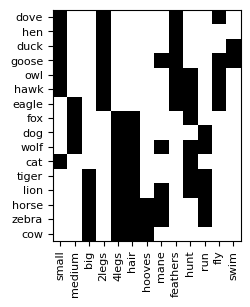

In [4]:
plt.figure(figsize=(3,3))
plt.xticks(np.arange(matrix.shape[1]), animals.columns, rotation=90, fontsize=8)
plt.yticks(np.arange(matrix.shape[0]), animals.index, fontsize=8)
plt.imshow(matrix, cmap='binary')

**Question 1a :** pouvez-vous identifier visuellement des groupes d'animaux ?

In [5]:
# Votre réponse ici :
# En effet nous pouvons visuellement identifier un cluster relativement grand pour [4 pattes, poils, sabots] allant de [vache à renard].
# Nous observons un autre cluster pour [plumes, chasse] allant de [aigle, colombe].
# A note encore les 2 plus petits: [chasse, course] de [zèbre à chien] et [vol, nage] à [aigle à canard].
#

## 2. Entraînement d'une carte de Kohonen

Le code fourni ci-dessous crée une carte auto-organisatrice, l'entraîne, et affiche le résultat final sous la forme d'une matrice-U.  Veuillez répondre aux questions qui suivent.

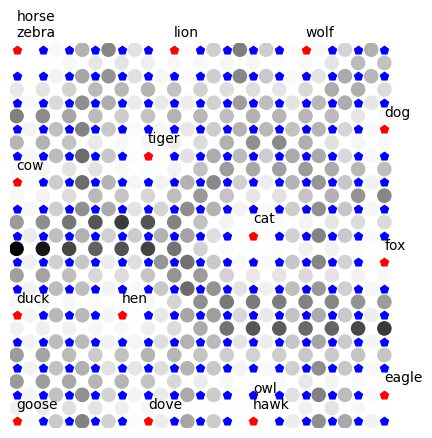

In [16]:
kmap = KohonenUtils.KohonenMap(15, 15, size_vector=len(animals.columns)) # initialiser la SOM

n_iter = 80

learning_rate = KohonenUtils.ExponentialTimeseries(1, 0.2, n_iter * len(animals.index))

neighborhood_size = KohonenUtils.ExponentialTimeseries(4./3 * len(animals.index), 1, n_iter * len(animals.index))

kmap.train(animals.values, np.array(animals.index), n_iter, learning_rate, neighborhood_size) # entraîner la SOM

kmap.plot_umatrix(plot_names=True, plot_empty=True, fontsize=10) # afficher le résultat

# Votre réponse ici :
# En choisissant une taille de 15x15, nous avons 225 neurones de sortie pour une granularité plus fine.
# avec 80 itératons nous nous assurons de la convergance du réseau.
# Avec cette configuration, nous pouvons observer des clusters plus fins et plus précis. Nous observons la séparations
# très claire entre les mammifères et les oiseaux avec la séparations de points en niveau de gris relativement foncée.
# Ensuite nous voyons également pour chaque mammifère 
# 
# 
# 

**Question 2a :** veuillez expliquer brièvement, avec vos propres mots, ce que représente la matrice U, en répondant aux questions suivantes :
- que représentent les trois paramètres du constructeur `KohonenMap` ?
- que représentent les points bleus ?
- que représentent les points rouges ?
- que représentent les points gris et les niveaux de gris ?
- pour une carte de taille _m_ * _n_, combien y a-t-il de points gris ?

In [ ]:
# Votre réponse ici :
# les 3 pramètres représentent respectivement le nombre de lignes, de colonnes et la taille du vecteur d'entrée.
# Les points bleus sont chaque unité (neurones de sortie) qui sont activable par le réseau
# Les points rouges sont les unités gagnantes (qui ont été sélectionnées par le réseau pour représenter les données)
# Les niveaux de gris les plus foncés sont représentent une distance plus grande entre les neurones. En revanche, les niveaux de gris plus clairs représentent une distance plus petite.
# Il y a m * (n-1) + (m-1) * n = 5*6 + 4*7 = 58 points gris


**Question 2b :** veuillez régler les paramètres du constructeur `KohonenMap` et le `n_iter` de façon à aboutir à une carte de Kohonen qui regroupe les seize animaux d'une manière qui vous semble cohérente.   Veuillez indiquer ci-dessous les paramètres choisis, lister les groupes observés d'animaux, et commenter le résultat.

In [ ]:
# Votre réponse ici :
# En choisissant une taille de 15x15, nous avons 225 neurones de sortie pour une granularité plus fine.
# avec 80 itérations nous nous assurons de la convergence du réseau.
# Avec cette configuration, nous pouvons observer des clusters plus fins et plus précis. Nous observons la séparations
# très claire entre les mammifères et les oiseaux avec la séparations de points en niveau de gris relativement foncée ce qui correspond au 
# cluster sur la carte binaire précédente.

# Ensuite nous voyons chaque mammifère dans son propre cluster. Le chat est plus proche du renard du tigre et du chien ce qui 
# parait logique. 
# Nous observons la même tendance pour les oiseaux. 
# Par exemple l'aigle est plus proche du faucon et la poule est plus proche du canard(cluster bassecour ;-)).


**Question 2c :** veuillez afficher une image de la matrice-U, au format PNG ou JPG, sur laquelle vous aurez dessiné les frontières visibles (à la main, avec un logiciel d'édition de votre choix).  Veillez à sauvegarder le notebook avec l'image avant l'envoi sur Cyberlearn.

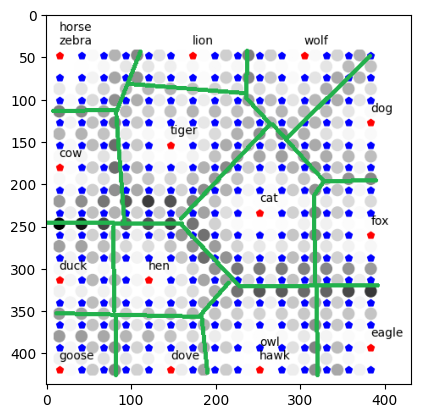

In [20]:
# Pour afficher votre image ici :

plt.imshow(mpimg.imread('m-u.png'))


## 3. Analyse des paramètres de l'entraînement

Dans cette section, le but est de comprendre les paramètres `learning_rate` et `neighborhood_size`.  Veuillez ré-exécuter les commandes ci-dessous qui les ré-initialisent.  On vous encourage à faire différents essais avant de répondre.

In [21]:
learning_rate = KohonenUtils.ExponentialTimeseries(1, 0.2, n_iter * len(animals.index))

**Question 3a :** veuillez expliquer avec vos propres mots le fonctionnement de `learning_rate` en répondant aux questions suivantes :
- quel est le type de `learning_rate` ?
- quelles sont les significations de ses trois paramètres ?
- pourquoi la valeur du troisième paramètre est-elle choisie ainsi ?
- comme fonctionne la `learning_rate` ?

In [ ]:
# Votre réponse ici :
# - Le type de learning_rate est une instance de la classe ExponentialTimeseries qui est une classe qui permet de générer une suite de valeurs décroissantes.
# - Le paramètre initial est la valeur de départ de la série.
# - Le paramètre final est la valeur finale de la série.
# - Le paramètre n_iter est le nombre de valeurs à générer.

# n_iter correspond au nombre d'itérations que l'on souhaite effectuer. En prenant le produit de la longueur des données et du nombre
# d'itérations, on s'assure que chaque donnée sera parcourue par chaque learning rate 1 fois au moins.

# Un intervalle est généré entre ln(initial) et ln(final) la série est générée entre ces bornes. La suite est ensuite élevée 
# l'exponentielle ce qui résulte en une suite de valeurs décroissantes.

**Question 3b :** veuillez afficher d'une façon convenable la ou les valeur(s) de la `learning_rate`.

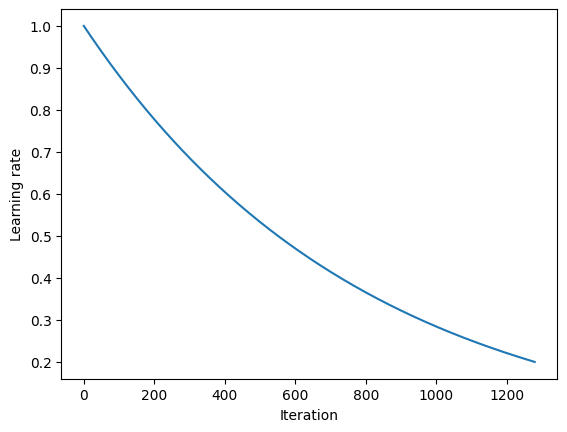

In [35]:

learning_rate = KohonenUtils.ExponentialTimeseries(1, 0.2, 80 * len(animals.index))

# Génération des valeurs de learning_rate
learning_rate_values = [learning_rate() for _ in range(80 * len(animals.index))]
 
plt.plot(learning_rate_values)
plt.xlabel('Iteration')
plt.ylabel('Learning rate')
plt.show()


On pose maintenant les mêmes questions pour `neighborhood_size`.  <br/> Si les réponses sont similaires, vous pouvez copier/coller les réponses précédentes.

In [ ]:
neighborhood_size = KohonenUtils.ExponentialTimeseries(4./3 * len(animals.index), 1, n_iter * len(animals.index))

**Question 3c :** veuillez expliquer avec vos propres mots le fonctionnement de `neighborhood_size` en répondant aux questions suivantes :
- quel est le type de `neighborhood_size` ?
- quelles sont les significations de ses trois paramètres ?
- comme fonctionne la `neighborhood_size` ?

In [ ]:
# Votre réponse ici :
# fonctionnement est le meme que learning_rate étant donné que la classe est la même. 
# A noter que le but du neighborhood est de déterminer quels unités (neurones de sortie) sont activées lors de l'apprentissage (fonction de voisinage).
# en prenant 4/3 de la longueur des données comme valeur initiale, on s'assure qu'un grand nombre d'unités seront activées au début de l'apprentissage.
# En revanche en prenant 1 comme valeur finale, on s'assure qu'en fin d'apprentissage, un seul neurone sera activé.

# - Le type de neighborhood_size est une instance de la classe ExponentialTimeseries qui est une classe qui permet de générer une suite de valeurs décroissantes.
# - Le paramètre initial est la valeur de départ de la série.
# - Le paramètre final est la valeur finale de la série.
# - Le paramètre n_iter est le nombre de valeurs à générer.

# n_iter correspond au nombre d'itérations que l'on souhaite effectuer. En prenant le produit de la longueur des données et du nombre
# d'itérations, on s'assure que chaque donnée sera parcourue par chaque learning rate 1 fois au moins.

# Un intervalle est généré entre ln(initial) et ln(final) la série est générée entre ces bornes. La suite est ensuite élevée 
# l'exponentielle ce qui résulte en une suite de valeurs décroissantes.

**Question 3d :** veuillez afficher d'une façon convenable la ou les valeur(s) de la `neighborhood_size`.

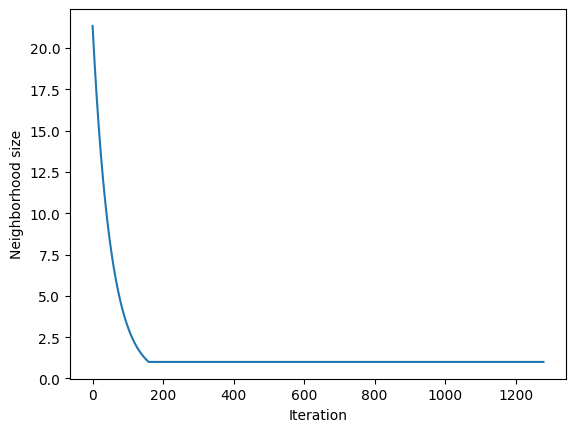

In [ ]:
# Votre code pour l'affichage de neighborhood_size ici :

nr = KohonenUtils.ExponentialTimeseries(4./3 * len(animals.index), 1, n_iter * len(animals.index))

# Génération des valeurs de neighborhood_size
nr_v = [nr() for _ in range(80 * len(animals.index))]
 
plt.plot(nr_v)
plt.xlabel('Iteration')
plt.ylabel('Neighborhood size')
plt.show()


**Fin du Labo 5.**  Veuillez nettoyer ce notebook, afficher les résultats et les commentaires demandés, l'enregistrer, et le soumettre comme devoir sur Cyberlearn.